INFO:tensorflow:Restoring parameters from /Users/Hi.JiGOO/Documents/study/deepLearning/pankyo/catdogbot/data/dogsvscats-0.001-2conv-basic.model
model loaded!


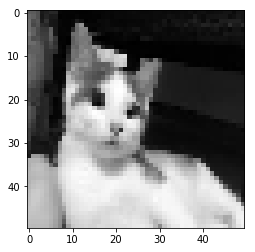

Cat


PermissionError: [Errno 13] Permission denied

In [9]:
from flask import Flask
from flask import request
from flask import jsonify

import requests
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import urllib.request
import io
import cv2

from CatDogModel import CatDogModel

TEST = True;
IMG_SIZE = 50

app = Flask(__name__)
cat_dog_model = CatDogModel()

def image_from_url(image_url):
    f = io.BytesIO(urllib.request.urlopen(image_url).read())
    img = Image.open(f)
    return img

def gray_image_from_url(image):
    image = np.array(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (IMG_SIZE,IMG_SIZE))
    return np.array(image)

# TEST
if TEST :
    image = image_from_url('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTNDJerebYjU3S4HUgWYwDAN1MSq0R8ARqGIjP4NQyDfN885fXt')
    image = gray_image_from_url(image);
    out = cat_dog_model.predict(image)

    plt.imshow(image, cmap='gray')
    plt.show()

    print(out)
#

@app.route('/')
def hello_world():
    return 'Hello World!'

@app.route('/webhook', methods=['POST'])
def webhook():
    dataDict = request.get_json()
    image_url = dataDict['result']['parameters']['coin-type'];
    
    image = image_from_url(image_url)
    image = gray_image_from_url(image);
    plt.imshow(image, cmap='gray')
    plt.show()

    predict = cat_dog_model.predict(image)
    print(predict)

    return jsonify({
        'speech': predict,
        'displayText': 'Dog or Cat result!',
    }), 200


if __name__ == '__main__':
    app.run(host='0.0.0.0', port=80)